# Decision Tree - Company Problem

## -------------------------------------------------------------------------------------------------------------------------------
## Problem Statement :-

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## 1. Import Libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset :

In [2]:
company_data = pd.read_csv('Company_Data.csv',sep=',')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Data Understanding :

### 3.1  About the data : 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
*  **Sales** -- Unit sales (in thousands) at each location
*  **Competitor Price** -- Price charged by competitor at each location
*  **Income** -- Community income level (in thousands of dollars)
*  **Advertising** -- Local advertising budget for company at each location (in thousands of dollars)
*  **Population** -- Population size in region (in thousands)
*  **Price** -- Price company charges for car seats at each site
*  **Shelf Location at stores** -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
*  **Age** -- Average age of the local population
*  **Education** -- Education level at each location
*  **Urban** -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
*  **US** -- A factor with levels No and Yes to indicate whether the store is in the US or not
 

### 3.2 Initial Analysis :

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## 4. Data Preparation :

In [6]:
# Renaming columns
company_data.columns =['sales','comp_price','income','advertising','population','price','shelf_loc','age','education','urban','us']
company_data.head()

,sales,comp_price,income,advertising,population,price,shelf_loc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
round(company_data['sales'].mean(),3)

7.496

In [8]:
round(company_data['sales'].median(),3)

7.49

In [9]:
#creating a target column 
company_data['target_sales'] = 'N/A'
company_data.head()

,sales,comp_price,income,advertising,population,price,shelf_loc,age,education,urban,us,target_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,N/A
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,N/A
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,N/A
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,N/A
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,N/A


In [10]:
# Above Mentioned that the target variable is based on sales.
# So we know that sales can be either **"High"** or "Low".
# Based on this sales price we must design a target variable.
# As we know that the average sales is "7.49". 
# So we can assume sales > 7.50 is "High" and sales < 7.50 is "Low"


for i in range(0,company_data.shape[0]):
    if company_data.sales[i] > 7.50:
        company_data.target_sales[i] = 'High'
    else:
        company_data.target_sales[i] = 'Low'

In [11]:
company_data.head()

,sales,comp_price,income,advertising,population,price,shelf_loc,age,education,urban,us,target_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
company_data.dtypes

sales           float64
comp_price        int64
income            int64
advertising       int64
population        int64
price             int64
shelf_loc        object
age               int64
education         int64
urban            object
us               object
target_sales     object
dtype: object

## 5. Data Pre-Processing :

### 5.1 Data Transformation :

In [13]:
company_data_copy = company_data.copy()
company_data_copy.head()

,sales,comp_price,income,advertising,population,price,shelf_loc,age,education,urban,us,target_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


#### I. First converting the object data types to "Categorical" Datatypes.

In [14]:
company_data_copy['shelf_loc']    = company_data_copy['shelf_loc'].astype('category')
company_data_copy['urban']        = company_data_copy['urban'].astype('category')
company_data_copy['us']           = company_data_copy['us'].astype('category')
company_data_copy['target_sales'] = company_data_copy['target_sales'].astype('category')

In [15]:
# checking the conversion
company_data_copy.dtypes

sales            float64
comp_price         int64
income             int64
advertising        int64
population         int64
price              int64
shelf_loc       category
age                int64
education          int64
urban           category
us              category
target_sales    category
dtype: object

#### II. Converting the converted "categorical" data types to "numerical" Datatypes using encoding technique.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
company_data_copy['shelf_loc']    = le.fit_transform(company_data_copy['shelf_loc'])
company_data_copy['urban']        = le.fit_transform(company_data_copy['urban'])
company_data_copy['us']           = le.fit_transform(company_data_copy['us'])
company_data_copy['target_sales'] = le.fit_transform(company_data_copy['target_sales'])

In [17]:
company_data_copy.head()

,sales,comp_price,income,advertising,population,price,shelf_loc,age,education,urban,us,target_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


##### 1. Shelf_loc transformation :

In [19]:
company_data['shelf_loc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [20]:
company_data_copy['shelf_loc'].unique()

array([0, 1, 2])

* 0 - **Bad**
* 1 - **Good**
* 2 - **Medium**

##### 2. Urban column transformation :

In [28]:
company_data['urban'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
company_data_copy['urban'].unique()

array([1, 0])

* 1 - **Yes**
* 2 - **No**

##### 3. US column transformation :

In [30]:
company_data['us'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
company_data_copy['us'].unique()

array([1, 0])

* 1 - **Yes**
* 2 - **No**

##### 4. Target_sales transformation :

In [32]:
company_data['target_sales'].unique()

array(['High', 'Low'], dtype=object)

In [33]:
company_data_copy['target_sales'].unique()

array([0, 1])

* 0 - **High**
* 1 - **Low** 

### 5.2 Checking dataset after transformation :

In [36]:
company_data_copy.dtypes

sales           float64
comp_price        int64
income            int64
advertising       int64
population        int64
price             int64
shelf_loc         int32
age               int64
education         int64
urban             int32
us                int32
target_sales      int32
dtype: object

In [37]:
company_data_copy.isna().sum()

sales           0
comp_price      0
income          0
advertising     0
population      0
price           0
shelf_loc       0
age             0
education       0
urban           0
us              0
target_sales    0
dtype: int64

## 6. Model Building :

In [38]:
del company_data_copy['sales']

In [40]:
X = company_data_copy.drop(labels= 'target_sales',axis=1)
y = company_data_copy[['target_sales']]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [45]:
X_train.shape, y_train.shape

((320, 10), (320, 1))

In [46]:
X_test.shape, y_test.shape

((80, 10), (80, 1))

## 7. Model Training :

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier()

#### Plotting the Decision tree :

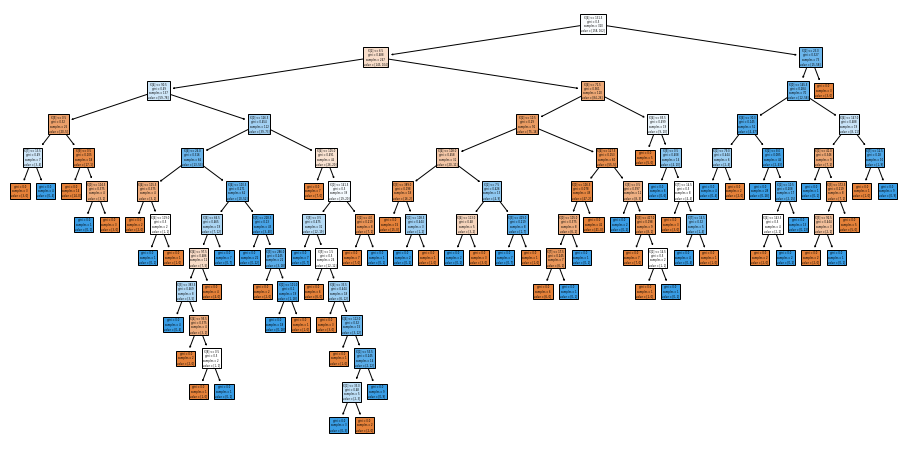

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(dt_model_1,filled = True)
plt.show()

In [53]:
dt_model_2 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dt_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

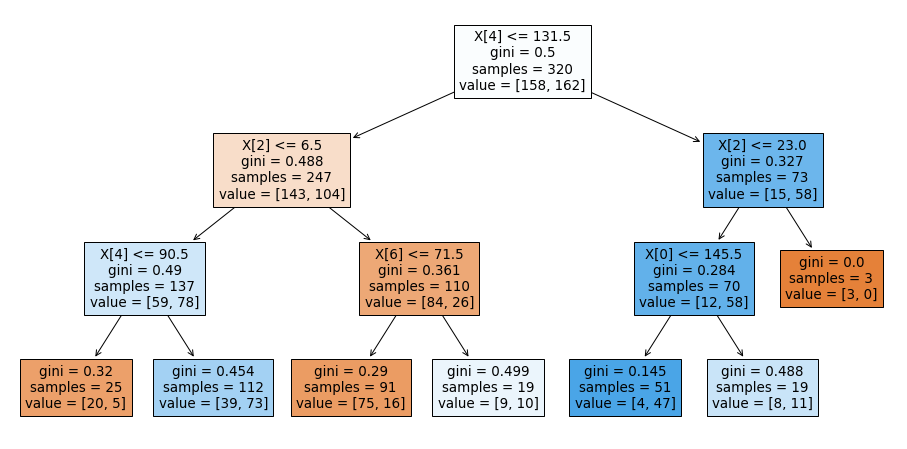

In [54]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_2,filled = True)
plt.show()

In [55]:
dt_model_3 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
dt_model_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

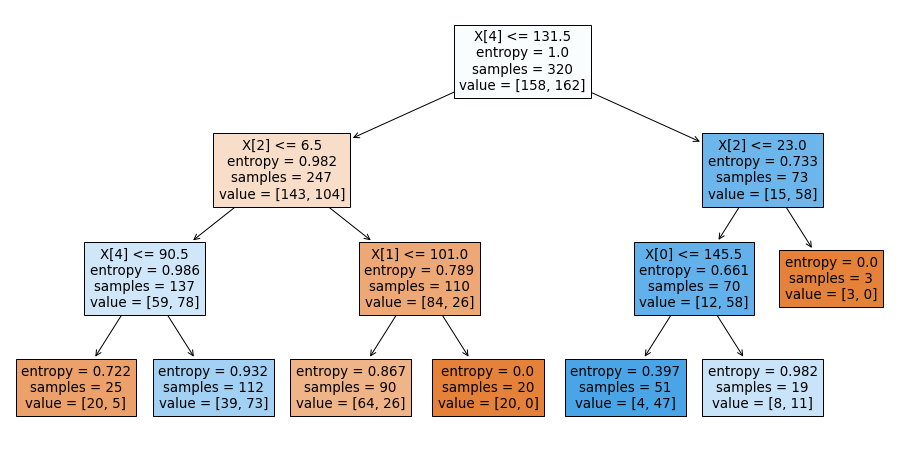

In [56]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_3,filled = True)
plt.show()

In [57]:
dt_model_4 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)
dt_model_4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

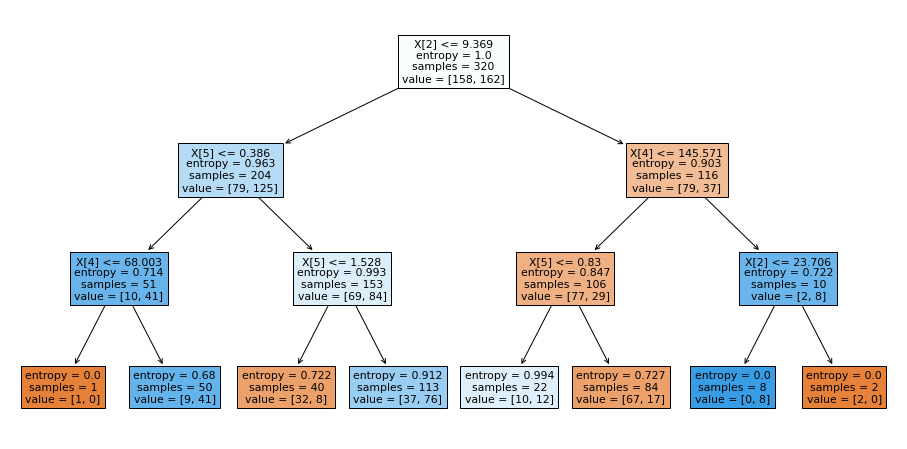

In [58]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_4,filled = True)
plt.show()

In [59]:
dt_model_5 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)
dt_model_5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

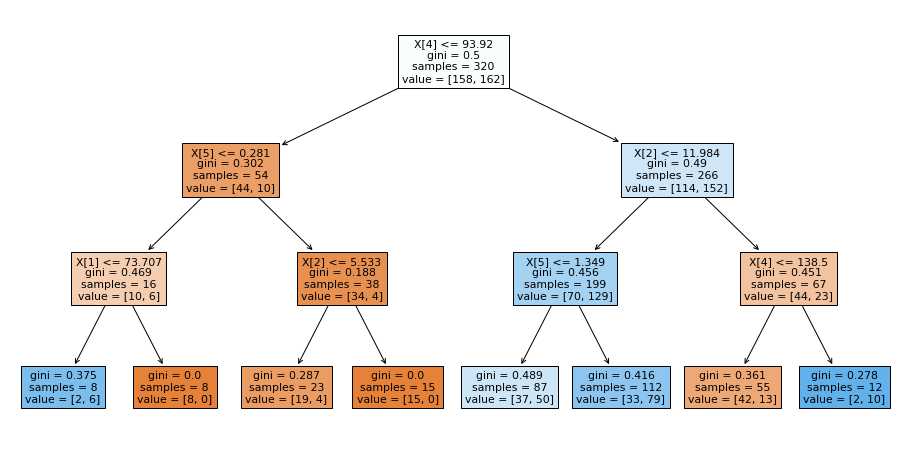

In [60]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_5,filled = True)
plt.show()

## 8. Model Testing :

In [61]:
# Training data :

y_predict_train_1 = dt_model_1.predict(X_train)
y_predict_train_2 = dt_model_2.predict(X_train)
y_predict_train_3 = dt_model_3.predict(X_train)
y_predict_train_4 = dt_model_4.predict(X_train)
y_predict_train_5 = dt_model_5.predict(X_train)

# Test data :

y_predict_test_1 = dt_model_1.predict(X_test)
y_predict_test_2 = dt_model_2.predict(X_test)
y_predict_test_3 = dt_model_3.predict(X_test)
y_predict_test_4 = dt_model_4.predict(X_test)
y_predict_test_5 = dt_model_5.predict(X_test)

## 9. Model Evaluation :

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

### 9.1 Training data :

#### Model - 1 :

In [63]:
print('MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_1),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_1))
print('Classification Report :\n',classification_report(y_train,y_predict_train_1))

MODEL - 1
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[158   0]
 [  0 162]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       162

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### Model - 2 :

In [64]:
print('MODEL - 2')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_2),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_2),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_2),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_2))
print('Classification Report :\n',classification_report(y_train,y_predict_train_2))

MODEL - 2
-------------------------------
Accuracy Score        : 0.7469
Precision Score       : 0.7015
Recall Score          : 0.8704
Confusion Matrix      :
 [[ 98  60]
 [ 21 141]]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.62      0.71       158
           1       0.70      0.87      0.78       162

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.74       320
weighted avg       0.76      0.75      0.74       320



#### Model - 3 :

In [65]:
print('MODEL - 3')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_3),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_3),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_3),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_3))
print('Classification Report :\n',classification_report(y_train,y_predict_train_3))

MODEL - 3
-------------------------------
Accuracy Score        : 0.7438
Precision Score       : 0.7198
Recall Score          : 0.8086
Confusion Matrix      :
 [[107  51]
 [ 31 131]]
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.68      0.72       158
           1       0.72      0.81      0.76       162

    accuracy                           0.74       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



#### Model - 4 :

In [66]:
print('MODEL - 4')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_4),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_4),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_4),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_4))
print('Classification Report :\n',classification_report(y_train,y_predict_train_4))

MODEL - 4
-------------------------------
Accuracy Score        : 0.7469
Precision Score       : 0.7098
Recall Score          : 0.8457
Confusion Matrix      :
 [[102  56]
 [ 25 137]]
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.65      0.72       158
           1       0.71      0.85      0.77       162

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.74       320
weighted avg       0.76      0.75      0.74       320



#### Model - 5 :

In [67]:
print('MODEL - 5')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_5),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_5),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_5),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_5))
print('Classification Report :\n',classification_report(y_train,y_predict_train_5))

MODEL - 5
-------------------------------
Accuracy Score        : 0.7156
Precision Score       : 0.6621
Recall Score          : 0.8951
Confusion Matrix      :
 [[ 84  74]
 [ 17 145]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.53      0.65       158
           1       0.66      0.90      0.76       162

    accuracy                           0.72       320
   macro avg       0.75      0.71      0.70       320
weighted avg       0.75      0.72      0.71       320



### 9.2 Test Data :

#### Model - 1:

In [68]:
print('MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_1),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_1))
print('Classification Report :\n',classification_report(y_test,y_predict_test_1))

MODEL - 1
-------------------------------
Accuracy Score        : 0.65
Precision Score       : 0.6579
Recall Score          : 0.625
Confusion Matrix      :
 [[27 13]
 [15 25]]
Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        40
           1       0.66      0.62      0.64        40

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



#### Model - 2 :

In [69]:
print('MODEL - 2')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_2),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_2),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_2),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_2))
print('Classification Report :\n',classification_report(y_test,y_predict_test_2))

MODEL - 2
-------------------------------
Accuracy Score        : 0.7
Precision Score       : 0.6667
Recall Score          : 0.8
Confusion Matrix      :
 [[24 16]
 [ 8 32]]
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        40
           1       0.67      0.80      0.73        40

    accuracy                           0.70        80
   macro avg       0.71      0.70      0.70        80
weighted avg       0.71      0.70      0.70        80



#### Model - 3 :

In [70]:
print('MODEL - 3')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_3),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_3),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_3),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_3))
print('Classification Report :\n',classification_report(y_test,y_predict_test_3))

MODEL - 3
-------------------------------
Accuracy Score        : 0.7
Precision Score       : 0.6905
Recall Score          : 0.725
Confusion Matrix      :
 [[27 13]
 [11 29]]
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.68      0.69        40
           1       0.69      0.72      0.71        40

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



#### Model - 4 :

In [71]:
print('MODEL - 4')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_4),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_4),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_4),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_4))
print('Classification Report :\n',classification_report(y_test,y_predict_test_4))

MODEL - 4
-------------------------------
Accuracy Score        : 0.65
Precision Score       : 0.625
Recall Score          : 0.75
Confusion Matrix      :
 [[22 18]
 [10 30]]
Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.55      0.61        40
           1       0.62      0.75      0.68        40

    accuracy                           0.65        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.66      0.65      0.65        80



#### Model - 5 :

In [72]:
print('MODEL - 5')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_5),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_5),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_5),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_5))
print('Classification Report :\n',classification_report(y_test,y_predict_test_5))

MODEL - 5
-------------------------------
Accuracy Score        : 0.65
Precision Score       : 0.6111
Recall Score          : 0.825
Confusion Matrix      :
 [[19 21]
 [ 7 33]]
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.61      0.82      0.70        40

    accuracy                           0.65        80
   macro avg       0.67      0.65      0.64        80
weighted avg       0.67      0.65      0.64        80



In [98]:
train_models_values = {'Train_Models':['Model_1','Model_2','Model_3','Model_4','Model_5'],
                       'Train_Accuracy_Scores':[round(accuracy_score(y_train,y_predict_train_1),4),
                                          round(accuracy_score(y_train,y_predict_train_2),4),
                                          round(accuracy_score(y_train,y_predict_train_3),4),
                                          round(accuracy_score(y_train,y_predict_train_4),4),
                                          round(accuracy_score(y_train,y_predict_train_5),4)],
                       'Test_Accuracy_Scores':[round(accuracy_score(y_test,y_predict_test_1),4),
                                          round(accuracy_score(y_test,y_predict_test_2),4),
                                          round(accuracy_score(y_test,y_predict_test_3),4),
                                          round(accuracy_score(y_test,y_predict_test_4),4),
                                          round(accuracy_score(y_test,y_predict_test_5),4)],
                      'Train_Precision_Scores':[round(precision_score(y_train,y_predict_train_1),4),
                                          round(precision_score(y_train,y_predict_train_2),4),
                                          round(precision_score(y_train,y_predict_train_3),4),
                                          round(precision_score(y_train,y_predict_train_4),4),
                                          round(precision_score(y_train,y_predict_train_5),4)],
                       'Test_Precision_Scores':[round(precision_score(y_test,y_predict_test_1),4),
                                             round(precision_score(y_test,y_predict_test_2),4),
                                             round(precision_score(y_test,y_predict_test_3),4),
                                             round(precision_score(y_test,y_predict_test_4),4),
                                             round(precision_score(y_test,y_predict_test_5),4)],
                      'Train_Recall_Scores':[round(recall_score(y_train,y_predict_train_1),4),
                                             round(recall_score(y_train,y_predict_train_2),4),
                                             round(recall_score(y_train,y_predict_train_3),4),
                                             round(recall_score(y_train,y_predict_train_4),4),
                                             round(recall_score(y_train,y_predict_train_5),4)],
                      'Test_Recall_Scores':[round(recall_score(y_test,y_predict_test_1),4),
                                            round(recall_score(y_test,y_predict_test_2),4),
                                            round(recall_score(y_test,y_predict_test_3),4),
                                            round(recall_score(y_test,y_predict_test_4),4),
                                            round(recall_score(y_test,y_predict_test_5),4)]}
train_models_values_df = pd.DataFrame(train_models_values)
train_models_values_df

,Train_Models,Train_Accuracy_Scores,Test_Accuracy_Scores,Train_Precision_Scores,Test_Precision_Scores,Train_Recall_Scores,Test_Recall_Scores
0,Model_1,1.0000,0.65,1.0000,0.6579,1.0000,0.625
1,Model_2,0.7469,0.70,0.7015,0.6667,0.8704,0.800
2,Model_3,0.7438,0.70,0.7198,0.6905,0.8086,0.725
3,Model_4,0.7469,0.65,0.7098,0.6250,0.8457,0.750
4,Model_5,0.7156,0.65,0.6621,0.6111,0.8951,0.825


### -------------------------------------------------------------------------------------------------------------------------------------------------------

### Improving the model accuracy:

#####  Improving Models Accuracy using Ada Boost Classifier :

###### Improvement of Model-1 

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
dt_model_6 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier())
dt_model_6.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [108]:
y_predict_train_6 = dt_model_6.predict(X_train)
y_predict_test_6  = dt_model_6.predict(X_test)

In [107]:
print('MODEL - 6')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_6),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_6),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_6),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_6))
print('Classification Report :\n',classification_report(y_test,y_predict_test_6))

MODEL - 6
-------------------------------
Accuracy Score        : 0.675
Precision Score       : 0.675
Recall Score          : 0.675
Confusion Matrix      :
 [[27 13]
 [13 27]]
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        40
           1       0.68      0.68      0.68        40

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.68        80
weighted avg       0.68      0.68      0.68        80



###### OBSERVATION :- 

 * Before Improving :- 
     * Accuracy Score        : 0.65
     * Precision Score       : 0.6579
     * Recall Score          : 0.625
     
 * After Improving:-
    * Accuracy Score        : 0.675
    * Precision Score       : 0.675
    * Recall Score          : 0.675

##### Improving Model-2

In [111]:
dt_model_7 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3))
dt_model_7.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))

In [117]:
y_predict_train_7 = dt_model_7.predict(X_train)
y_predict_test_7  = dt_model_7.predict(X_test)

###### Train Data Observation of model-7 

In [113]:
print('MODEL - 7')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_7),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_7),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_7),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_7))
print('Classification Report :\n',classification_report(y_train,y_predict_train_7))

MODEL - 7
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[158   0]
 [  0 162]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       162

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



###### OBSERVATION :- Train data model-2 before improvement :
* Accuracy Score        : 0.7469
* Precision Score       : 0.7015
* Recall Score          : 0.8704

###### Train data after improvement :
* Accuracy Score        : 1.0
* Precision Score       : 1.0
* Recall Score          : 1.0

##### Test data observation  of model -7 :

In [114]:
print('MODEL - 7')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_7),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_7),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_7),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_7))
print('Classification Report :\n',classification_report(y_test,y_predict_test_7))

MODEL - 7
-------------------------------
Accuracy Score        : 0.7125
Precision Score       : 0.6977
Recall Score          : 0.75
Confusion Matrix      :
 [[27 13]
 [10 30]]
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        40
           1       0.70      0.75      0.72        40

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



###### OBSERVATION :- The test data observation of model-2 before improvement :
* Accuracy Score        : 0.7
* Precision Score       : 0.6667
* Recall Score          : 0.8

###### The test data performance after improvement :
* Accuracy Score        : 0.7125
* Precision Score       : 0.6977
* Recall Score          : 0.75

In [115]:
from sklearn.ensemble import BaggingClassifier

##### Improving Model-3 using bagging classifier:

In [116]:
dt_model_8 = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3))
dt_model_8.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3))

In [118]:
y_predict_train_8 = dt_model_8.predict(X_train)
y_predict_test_8  = dt_model_8.predict(X_test)

###### Train data observation Model-8

In [119]:
print('MODEL - 8')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_8),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_8),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_8),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_8))
print('Classification Report :\n',classification_report(y_train,y_predict_train_8))

MODEL - 8
-------------------------------
Accuracy Score        : 0.8219
Precision Score       : 0.7966
Recall Score          : 0.8704
Confusion Matrix      :
 [[122  36]
 [ 21 141]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       158
           1       0.80      0.87      0.83       162

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



##### OBSERVATION :- The train data of Model-3 before improvement performed as follows :
* Accuracy Score        : 0.7438
* Precision Score       : 0.7198
* Recall Score          : 0.8086

#### The train data performance of model-3 after improving :
* Accuracy Score        : 0.8219
* Precision Score       : 0.7966
* Recall Score          : 0.8704

##### Test data observation of model-8 :

In [120]:
print('MODEL - 8')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_8),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_8),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_8),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_8))
print('Classification Report :\n',classification_report(y_test,y_predict_test_8))

MODEL - 8
-------------------------------
Accuracy Score        : 0.775
Precision Score       : 0.775
Recall Score          : 0.775
Confusion Matrix      :
 [[31  9]
 [ 9 31]]
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.78      0.78      0.78        40

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.78      0.78      0.78        80



##### OBSERVATION :- The model-3 test performance before improvement :-
* Accuracy Score        : 0.7
* Precision Score       : 0.6905
* Recall Score          : 0.725

##### The test model-3 performance after improvement:-
* Accuracy Score        : 0.775
* Precision Score       : 0.775
* Recall Score          : 0.775

### Hence we can see that models are getting improved their test performance when the ensemble techniques are applied to the decision tree.

### Some ensemble techniques are : Ada Boost Classifier,Bagging Classifier,Extra tree classifier, Random Forest classifier... .etc.